In [1]:
import matplotlib.pylab as plt
import numpy as np
import correctionlib

In [35]:
datadict = {}
datadict['signal'] = np.genfromtxt('output_signal_22BAB5D2-9E3F-E440-AB30-AE6DBFDF6C83.csv', delimiter=',', names=True, dtype=float)
datadict['tt_semilep'] = np.genfromtxt('output_tt_semilep_08FCB2ED-176B-064B-85AB-37B898773B98.csv', delimiter=',', names=True, dtype=float)
datadict['tt_had'] = np.genfromtxt('output_tt_had_009086DB-1E42-7545-9A35-1433EC89D04B.csv', delimiter=',', names=True, dtype=float)

In [12]:
import gzip
with gzip.open("POG/LUM/2016postVFP_UL/puWeights.json.gz",'rt') as file:
    data = file.read().strip()
    evaluator = correctionlib._core.CorrectionSet.from_string(data)

In [36]:
hists = {}
for sample in datadict.keys():
    hists[sample] = {
        "pu": datadict[sample]['pileup'],
        "genWeight": datadict[sample]['weight']/np.abs(datadict[sample]['weight']),
        "mtt": datadict[sample]['mtt'],
        "pu_weight": [evaluator["Collisions16_UltraLegacy_goldenJSON"].evaluate(n,"nominal") for n in datadict[sample]['pileup']],
        "pu_weight_up": [evaluator["Collisions16_UltraLegacy_goldenJSON"].evaluate(n,"up") for n in datadict[sample]['pileup']],
        "pu_weight_dn": [evaluator["Collisions16_UltraLegacy_goldenJSON"].evaluate(n,"down") for n in datadict[sample]['pileup']]
    } 

In [37]:
print(hists['tt_semilep']['genWeight'])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

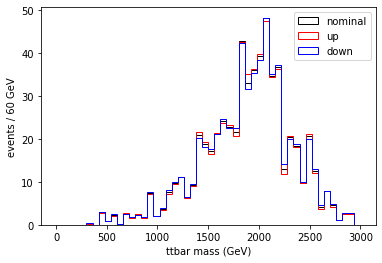

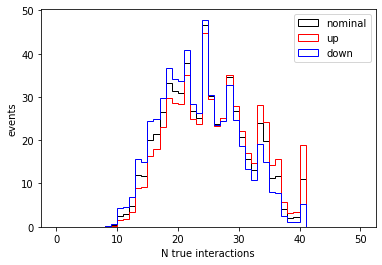

In [38]:
plt.hist(hists['signal']['mtt'],
         bins=50,range=(0,3000),
         weights=hists['signal']['genWeight']*hists['signal']['pu_weight'],
         histtype="step",color="k",label="nominal")
plt.hist(hists['signal']['mtt'],
         bins=50,range=(0,3000),
         weights=hists['signal']['genWeight']*hists['signal']['pu_weight_up'],
         histtype="step",color="r",label="up")
plt.hist(hists['signal']['mtt'],
         bins=50,range=(0,3000),
         weights=hists['signal']['genWeight']*hists['signal']['pu_weight_dn'],
         histtype="step",color="b",label="down")
plt.legend()
plt.xlabel('ttbar mass (GeV)')
plt.ylabel('events / 60 GeV')
plt.show()

plt.hist(hists['signal']['pu'],
         bins=50,range=(0,50),
         weights=hists['signal']['genWeight']*hists['signal']['pu_weight'],
         histtype="step",color="k",label="nominal")
plt.hist(hists['signal']['pu'],
         bins=50,range=(0,50),
         weights=hists['signal']['genWeight']*hists['signal']['pu_weight_up'],
         histtype="step",color="r",label="up")
plt.hist(hists['signal']['pu'],
         bins=50,range=(0,50),
         weights=hists['signal']['genWeight']*hists['signal']['pu_weight_dn'],
         histtype="step",color="b",label="down")
plt.legend()
plt.xlabel('N true interactions')
plt.ylabel('events')
plt.show()

### Skipping plotting all the things...Matt's job!

Saving all the things we want from hists to a ROOT file...let's go to the ROOT container with a pickle file
Save your pickle file, then exit the notebook. In your terminal, copy the pickle file to your ROOT container shared folder. Then launch your ROOT container.

In [39]:
import pickle

In [41]:
with open('hists_for_ROOT.p','wb') as f:
    pickle.dump(hists,f)